# First Dataset

In [92]:
!pip install --upgrade --no-cache-dir gdown



In [93]:
!gdown 1od59eolcBDiEHmor755GktJHzI_Cy2XN

Downloading...
From: https://drive.google.com/uc?id=1od59eolcBDiEHmor755GktJHzI_Cy2XN
To: /content/drug200.xls
100% 5.83k/5.83k [00:00<00:00, 16.7MB/s]


## Libraries

In [94]:
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , DecisionTreeClassifier , export_graphviz
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

## Info

In [ ]:


df=pd.read_csv('drug200.xls', header=0  )
print(df.columns)


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [ ]:
print(df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [ ]:
print(df.shape)

(200, 6)


In [ ]:
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [ ]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
print(df.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [ ]:
print(df['Drug'])

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


## preprocessing

In [95]:
# Identify object type features and count unique values
object_columns = df.select_dtypes(include='object').columns
unique_counts = df[object_columns].nunique()

# Display the results
print("Unique counts for object type features:")
print(unique_counts)


Unique counts for object type features:
Sex            2
BP             3
Cholesterol    2
Drug           5
dtype: int64


In [96]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

X = df[['Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Age']]
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (140, 5) (140,)
Testing set shape: (60, 5) (60,)


## Decision Tree

In [97]:
clf_M = DecisionTreeClassifier(random_state=24)
clf_M.fit(X_train, y_train)
clf_M.score(X_test,y_test)


1.0

In [98]:
y_pred =clf_M.predict(X_test)
print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(classification_report(y_pred , y_test))



1.0
[[ 8  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:

tree.plot_tree?

[Text(0.625, 0.9, 'Na_to_K <= -0.211\ngini = 0.676\nsamples = 140\nvalue = [15, 10, 10, 38, 67]'),
 Text(0.5, 0.7, 'BP <= -0.553\ngini = 0.649\nsamples = 73\nvalue = [15, 10, 10, 38, 0]'),
 Text(0.25, 0.5, 'Age <= 0.284\ngini = 0.48\nsamples = 25\nvalue = [15, 10, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.5, 'BP <= 0.676\ngini = 0.33\nsamples = 48\nvalue = [0, 0, 10, 38, 0]'),
 Text(0.625, 0.3, 'Cholesterol <= 0.057\ngini = 0.496\nsamples = 22\nvalue = [0, 0, 10, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 67\nvalue = [0, 0, 0, 0, 67]')]

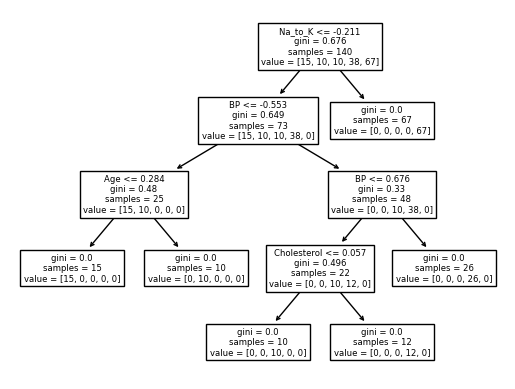

In [ ]:
tree.plot_tree(clf_M,feature_names=('Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Age'))

In [ ]:
f_tree = tree.export_text(clf_M,feature_names=('Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Age'))
print(f_tree)

|--- Na_to_K <= -0.21
|   |--- BP <= -0.55
|   |   |--- Age <= 0.28
|   |   |   |--- class: 0
|   |   |--- Age >  0.28
|   |   |   |--- class: 1
|   |--- BP >  -0.55
|   |   |--- BP <= 0.68
|   |   |   |--- Cholesterol <= 0.06
|   |   |   |   |--- class: 2
|   |   |   |--- Cholesterol >  0.06
|   |   |   |   |--- class: 3
|   |   |--- BP >  0.68
|   |   |   |--- class: 3
|--- Na_to_K >  -0.21
|   |--- class: 4



In [ ]:
print(clf_M.tree_.node_count)
print(clf_M.tree_.n_classes)
print(clf_M.tree_.n_features)
print(clf_M.tree_.n_leaves)
print(clf_M.get_depth())
#print(clf_M.tree_.children_left)
#print(clf_M.tree_.children_right)
#print(clf_M.tree_.feature)
#print(clf_M.tree_.threshold)
#print(clf_M.tree_.impurity)


11
[5]
5
6
4


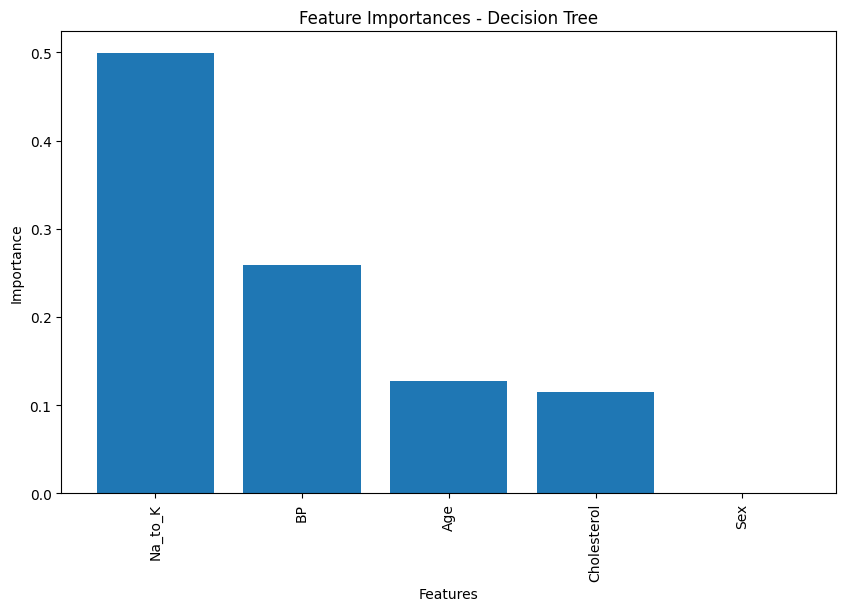

In [100]:
importances = clf_M.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## DT with different Hp

In [ ]:
DecisionTreeClassifier?

[Text(0.6666666666666666, 0.875, 'Na_to_K <= -0.211\ngini = 0.676\nsamples = 140\nvalue = [15, 10, 10, 38, 67]'),
 Text(0.5, 0.625, 'BP <= -0.553\ngini = 0.649\nsamples = 73\nvalue = [15, 10, 10, 38, 0]'),
 Text(0.3333333333333333, 0.375, 'Age <= 0.284\ngini = 0.48\nsamples = 25\nvalue = [15, 10, 0, 0, 0]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.33\nsamples = 48\nvalue = [0, 0, 10, 38, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 67\nvalue = [0, 0, 0, 0, 67]')]

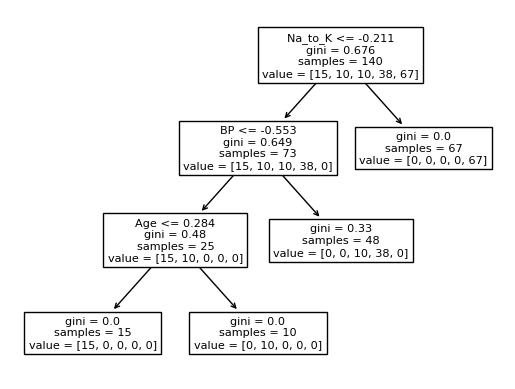

In [ ]:
clf_M2 = DecisionTreeClassifier(random_state=24,ccp_alpha=0.05,max_depth=3)
clf_M2.fit(X_train, y_train)
clf_M2.score(X_test,y_test)
tree.plot_tree(clf_M2,feature_names=('Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Age'))

In [ ]:
y_pred =clf_M2.predict(X_test)
print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(classification_report(y_pred , y_test))


0.9
[[ 8  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  6 16  0]
 [ 0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         0
           3       1.00      0.73      0.84        22
           4       1.00      1.00      1.00        24

    accuracy                           0.90        60
   macro avg       0.80      0.75      0.77        60
weighted avg       1.00      0.90      0.94        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## AdaBoost

In [ ]:
AdaBoostClassifier?


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the AdaBoostClassifier
# Initialize the DecisionTreeClassifier with 'entropy' criterion
base_estimator = DecisionTreeClassifier(random_state=24,ccp_alpha=0.05,max_depth=3)

# Initialize the AdaBoostClassifier with the custom base estimator
clf_M_ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=24)

# Train the classifier
clf_M_ada.fit(X_train, y_train)
# Predict on the test set
y_pred = clf_M_ada.predict(X_test)



# Calculate evaluation metrics
accuracy_ada = accuracy_score(y_test, y_pred)
clf_rep_ada = classification_report(y_test, y_pred)
Confusion_ada = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_ada)
print("Confusion Matrix:\n",Confusion_ada)
print("Classification Report/n:", clf_rep_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 1.0
Confusion Matrix:
 [[ 8  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 24]]
Classification Report/n:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



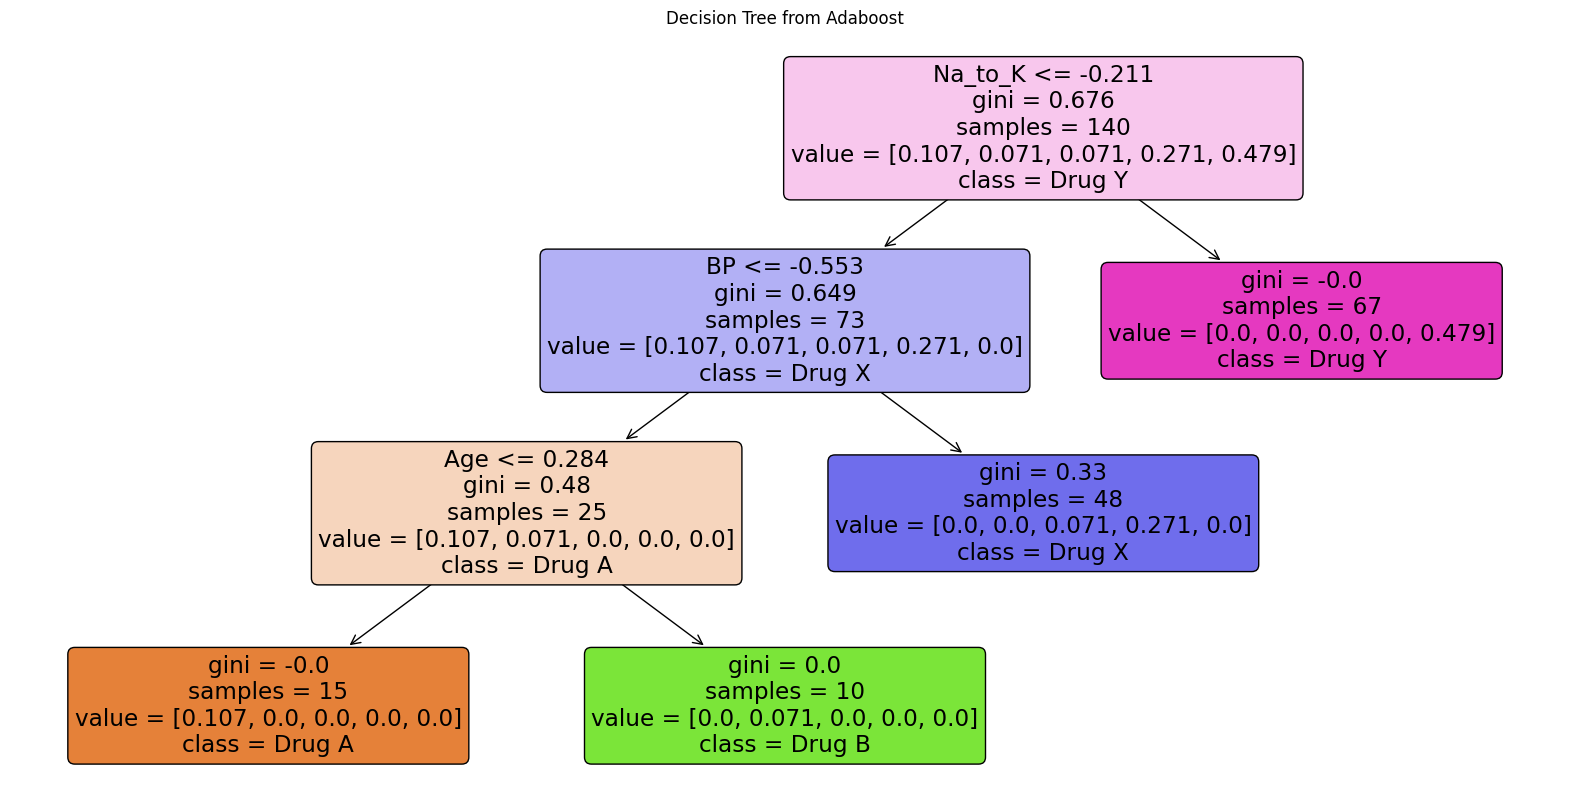

In [ ]:
from sklearn.tree import plot_tree

# Plot a single tree from Adaboost
plt.figure(figsize=(20, 10))
plot_tree(clf_M_ada.estimators_[0], filled=True, feature_names=X.columns, class_names=['Drug A', 'Drug B', 'Drug C', 'Drug X', 'Drug Y'], rounded=True)
plt.title('Decision Tree from Adaboost')
plt.show()


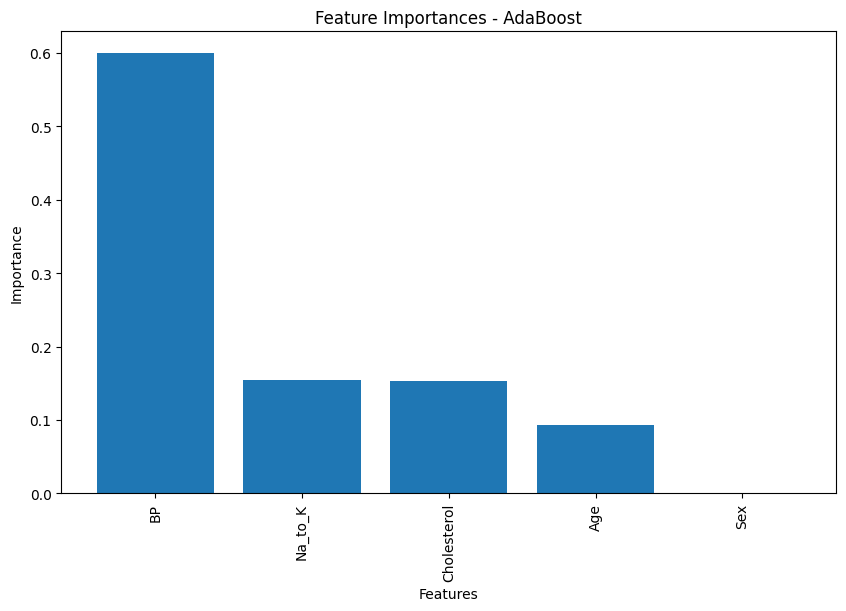

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from AdaBoost
importances_ada = clf_M_ada.feature_importances_
indices_ada = np.argsort(importances_ada)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - AdaBoost")
plt.bar(range(X_train.shape[1]), importances_ada[indices_ada], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices_ada], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## Random Forest

In [ ]:
# Initialize the RandomForestClassifier
clf_RF= RandomForestClassifier(random_state=24)

# Train the classifier
clf_RF.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_RF.predict(X_test)

# Calculate evaluation metrics
accuracy_RF = accuracy_score(y_test, y_pred)
clf_rep_RF = classification_report(y_test, y_pred)
Confusion_RF = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_RF)
print("Confusion Matrix\n:",Confusion_RF)
print("Classification Report:\n", clf_rep_RF)


Accuracy: 1.0
Confusion Matrix
: [[ 8  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 24]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        24

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



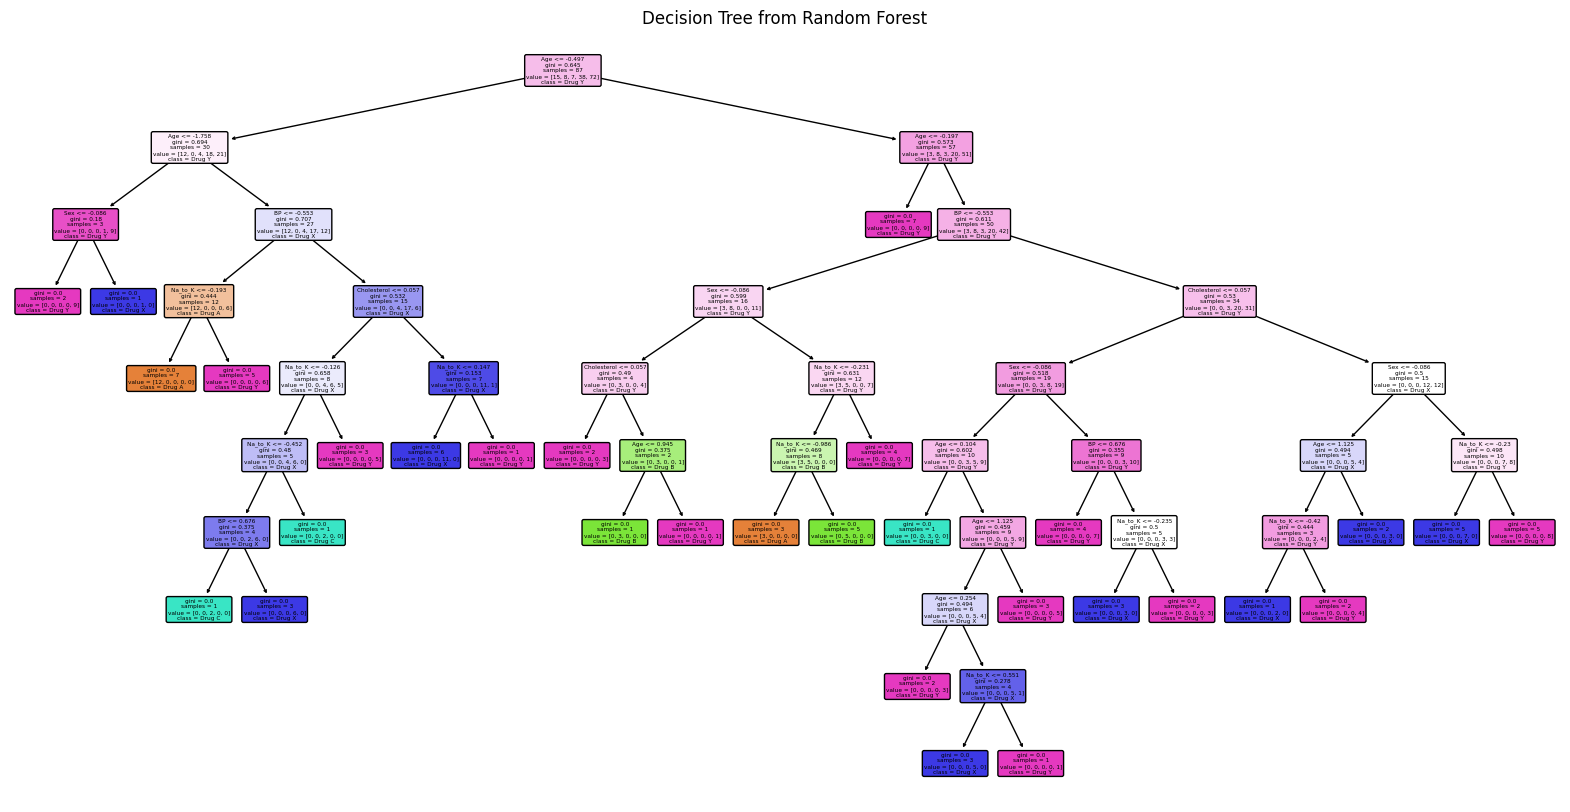

In [ ]:
from sklearn.tree import plot_tree

# Plot a single tree from Random Forest
plt.figure(figsize=(20, 10))
plot_tree(clf_RF.estimators_[0], filled=True, feature_names=X.columns, class_names=['Drug A', 'Drug B', 'Drug C', 'Drug X', 'Drug Y'], rounded=True)
plt.title('Decision Tree from Random Forest')
plt.show()


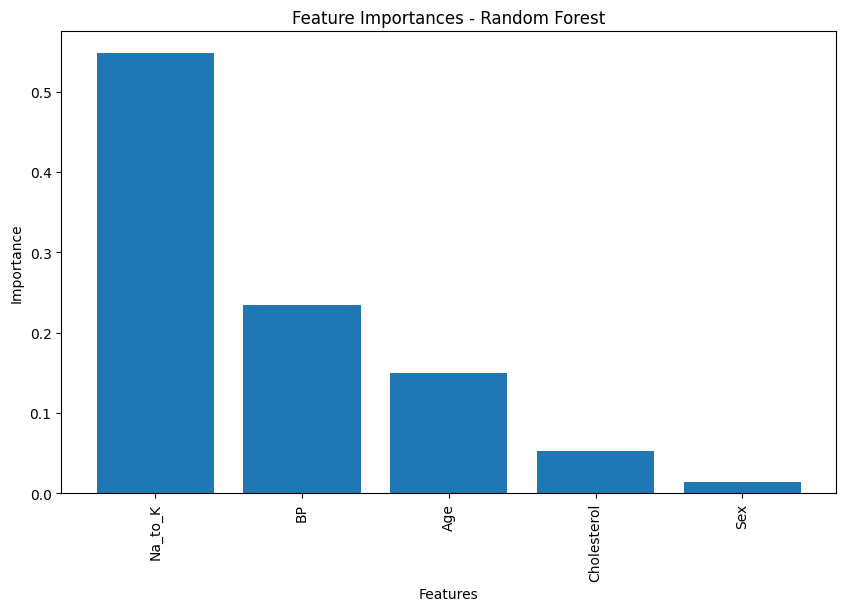

In [ ]:
importances_rf = clf_RF.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices_rf], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## K_fold & stratified K_fold for Q2

Fold 1 Test Accuracy: 1.0
Fold 1 Test Accuracy: 1.0
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Fold 2 Test Accuracy: 1.0
Fold 2 Test Accuracy: 1.0
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        15

    accuracy

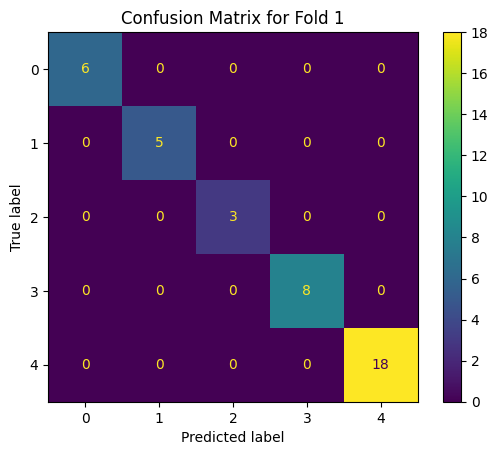

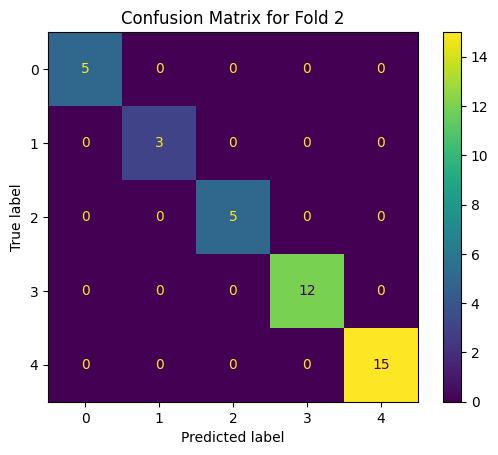

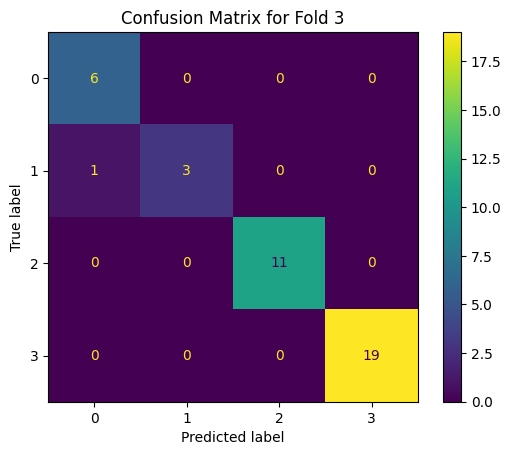

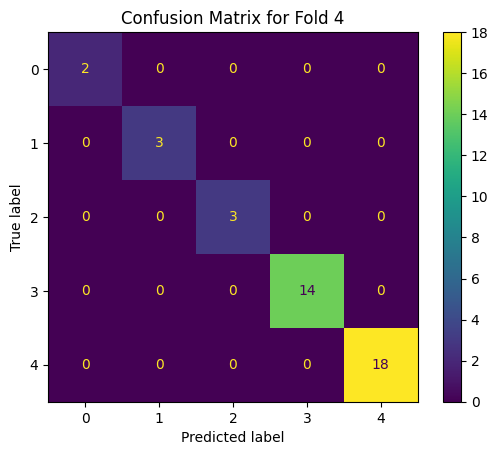

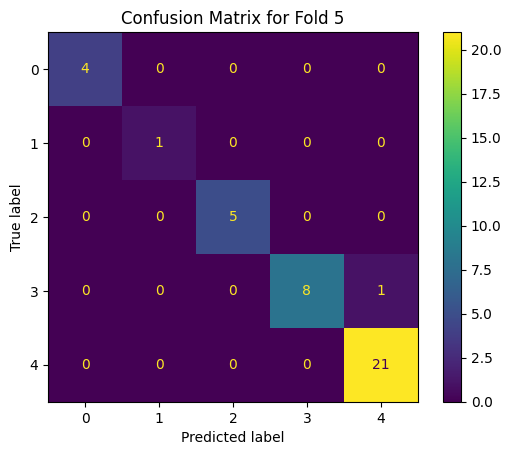

Average Accuracy over 5 folds: 0.99


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame and 'Drug' is the target column
# For this example, let's use a mock DataFrame df
# df = pd.DataFrame({...})

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

X = df[['Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Age']].values
y = df['Drug'].values

# Initialize K-Fold
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=24)

# Lists to store the results
fold_accuracies = []
fold_confusion_matrices = []
fold_classification_reports = []
# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the Decision Tree model
    clf_M = DecisionTreeClassifier(random_state=24)

    # Train the model
    clf_M.fit(X_train, y_train)

    # Evaluate the model
    y_pred = clf_M.predict(X_test)
    test_accuracy = clf_M.score(X_test, y_test)
    fold_accuracies.append(test_accuracy)

    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fold_confusion_matrices.append(cm)
    print(f'Fold {fold} Test Accuracy: {test_accuracy}')
    # Compute and store classification report
    clf_report = classification_report(y_test, y_pred)
    fold_classification_reports.append(clf_report)

    print(f'Fold {fold} Test Accuracy: {test_accuracy}')
    print(f'Classification Report for Fold {fold}:\n{clf_report}\n')

# Plot confusion matrix for each fold
for fold, cm in enumerate(fold_confusion_matrices, 1):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()

# Calculate the average accuracy
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy over {k} folds: {average_accuracy}')


Fold 1 Test Accuracy: 1.0
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Fold 1 Test Accuracy: 1.0
Fold 2 Test Accuracy: 1.0
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        18

    accuracy                          

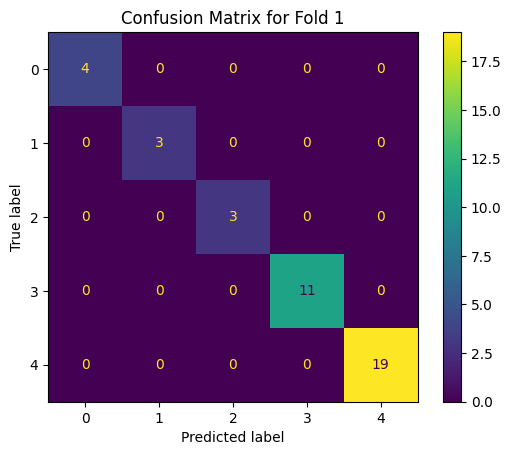

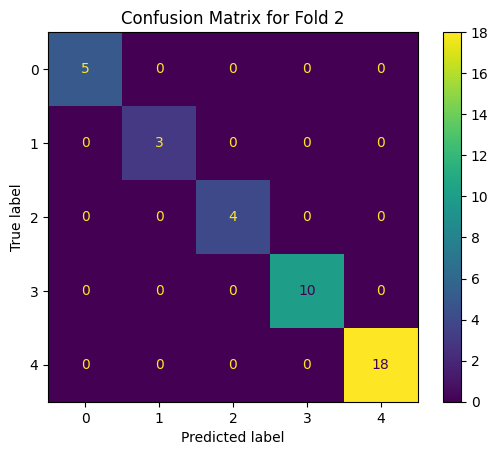

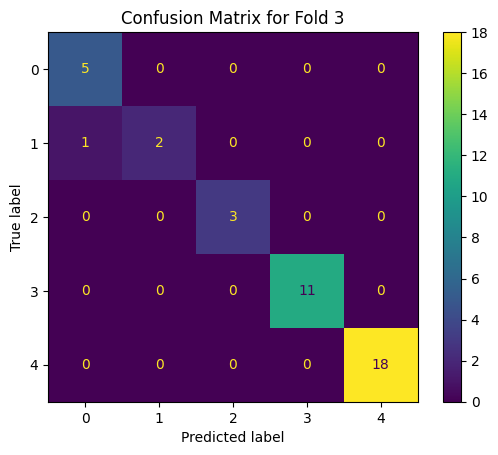

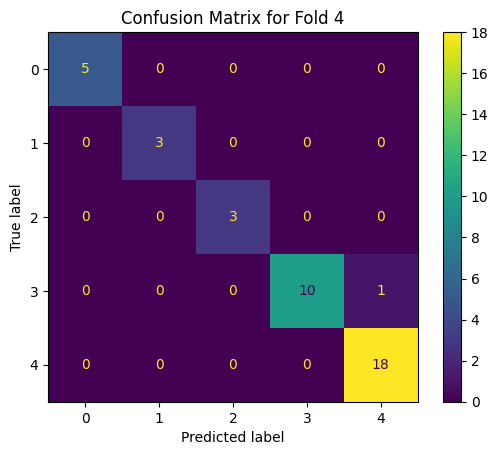

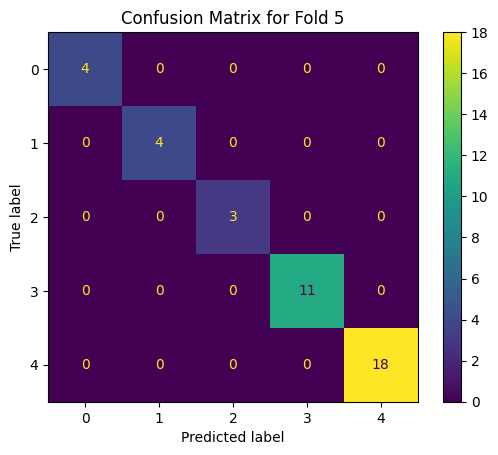

Average Accuracy over 5 folds: 0.99


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=24)

# Lists to store the results
fold_accuracies = []
fold_confusion_matrices = []
fold_classification_reports = []
# Perform Stratified K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the Decision Tree model
    clf_M = DecisionTreeClassifier(random_state=24)

    # Train the model
    clf_M.fit(X_train, y_train)

    # Evaluate the model
    y_pred = clf_M.predict(X_test)
    test_accuracy = clf_M.score(X_test, y_test)
    fold_accuracies.append(test_accuracy)

    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fold_confusion_matrices.append(cm)

    # Compute and store classification report
    clf_report = classification_report(y_test, y_pred)
    fold_classification_reports.append(clf_report)

    print(f'Fold {fold} Test Accuracy: {test_accuracy}')
    print(f'Classification Report for Fold {fold}:\n{clf_report}\n')

    print(f'Fold {fold} Test Accuracy: {test_accuracy}')

# Plot confusion matrix for each fold
for fold, cm in enumerate(fold_confusion_matrices, 1):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()

# Calculate the average accuracy
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy over {k} folds: {average_accuracy}')


# Second Dataset

## Libraries

In [104]:
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , DecisionTreeClassifier , export_graphviz




### info

In [130]:
#dir(cov_type)

In [ ]:
print(cov_type.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

In [ ]:
print(cov_type.target_names)
cov_type.feature_names


['Cover_Type']


['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_0',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_0',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39']

## Data

In [109]:
# URL to the Covertype dataset on UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

# Column names for the dataset
column_names = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
] + [f"Wilderness_Area_{i}" for i in range(4)] + [f"Soil_Type_{i}" for i in range(40)] + ["Cover_Type"]

# Load the dataset
data = pd.read_csv(url, header=None, names=column_names)


In [116]:

#cov_type = fetch_covtype()
cov_type = data

In [ ]:
#cov_type = fetch_covtype(random_state=24)

#,as_frame=True
cov_type.data.shape , cov_type.target.shape

In [117]:
#X , y = cov_type.data , cov_type.target
# Separate features and target
X = data.drop(columns=["Cover_Type"])
y = data["Cover_Type"]
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 ,random_state = 24)


## Partial Tree

In [118]:
clf = DecisionTreeClassifier(random_state=24 , max_depth=15  , max_features=12)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)



0.8230854625095738

In [119]:
y_pred =clf.predict(X_test)
print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(classification_report(y_pred , y_test))



0.8230854625095738
[[34038  6267     2     0    44     4   953]
 [ 7704 49615   597     2   994   509    46]
 [    6   301  5878   164    34  1037     0]
 [    0     3   113   372     0    17     0]
 [   28   187     1     0   787     7     0]
 [   19   255   508    23    33  1914     0]
 [  623    77     0     0     0     0  3041]]
              precision    recall  f1-score   support

           1       0.80      0.82      0.81     41308
           2       0.87      0.83      0.85     59467
           3       0.83      0.79      0.81      7420
           4       0.66      0.74      0.70       505
           5       0.42      0.78      0.54      1010
           6       0.55      0.70      0.61      2752
           7       0.75      0.81      0.78      3741

    accuracy                           0.82    116203
   macro avg       0.70      0.78      0.73    116203
weighted avg       0.83      0.82      0.83    116203



In [126]:
p_tree = tree.export_text(clf)
print(p_tree)

|--- feature_0 <= 3044.50
|   |--- feature_5 <= 1435.00
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_9 <= 1437.50
|   |   |   |   |--- feature_45 <= 0.50
|   |   |   |   |   |--- feature_0 <= 2591.50
|   |   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 15.00
|   |   |   |   |   |   |   |   |--- feature_7 <= 236.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 92.50
|   |   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_5 >  92.50
|   |   |   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   

In [129]:
tree.plot_tree(clf)

[Text(0.5867794031532289, 0.96875, 'x[0] <= 3044.5\ngini = 0.623\nsamples = 464809\nvalue = [169422, 226596, 28655, 2186, 7601, 13879, 16470]'),
 Text(0.31277769388005433, 0.90625, 'x[5] <= 1435.0\ngini = 0.553\nsamples = 269690\nvalue = [46138, 171167, 28655, 2186, 7601, 13879, 64]'),
 Text(0.16840593998682654, 0.84375, 'x[10] <= 0.5\ngini = 0.661\nsamples = 113084\nvalue = [13989, 58736, 23415, 2071, 4165, 10708, 0]'),
 Text(0.11676249210264544, 0.78125, 'x[9] <= 1437.5\ngini = 0.703\nsamples = 80122\nvalue = [7880, 34279, 23415, 2071, 1769, 10708, 0]'),
 Text(0.08046228089041832, 0.71875, 'x[45] <= 0.5\ngini = 0.71\nsamples = 56943\nvalue = [3985, 19590, 21098, 1726, 905, 9639, 0]'),
 Text(0.05581287302398107, 0.65625, 'x[0] <= 2591.5\ngini = 0.709\nsamples = 54029\nvalue = [3554, 17204, 21098, 1726, 808, 9639, 0]'),
 Text(0.0283725064523067, 0.59375, 'x[23] <= 0.5\ngini = 0.599\nsamples = 34718\nvalue = [34, 4270, 19460, 1726, 92, 9136, 0]'),
 Text(0.01209471448542854, 0.53125, 'x[

Error in callback <function _draw_all_if_interactive at 0x7941cb331000> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7941cb330280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#clf.tree_.node_count
#clf.tree_.n_classes
#clf.tree_.n_features
#clf.tree_.n_leaves
#clf.tree_.children_left
#clf.tree_.children_right
#clf.tree_.feature
#clf.tree_.threshold
#clf.tree_.impurity
#clf.get_depth()


## Full Decision tree

In [ ]:
clf = DecisionTreeClassifier(random_state=24)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.9401822672392279

In [ ]:
f_tree = tree.export_text(clf,feature_names=cov_type['feature_names'])
print(f_tree)

|--- Elevation <= 3044.50
|   |--- Elevation <= 2510.50
|   |   |--- Horizontal_Distance_To_Hydrology <= 15.00
|   |   |   |--- Wilderness_Area_2 <= 0.50
|   |   |   |   |--- Elevation <= 2340.50
|   |   |   |   |   |--- Hillshade_9am <= 194.50
|   |   |   |   |   |   |--- Soil_Type_9 <= 0.50
|   |   |   |   |   |   |   |--- Horizontal_Distance_To_Roadways <= 540.50
|   |   |   |   |   |   |   |   |--- Elevation <= 1923.50
|   |   |   |   |   |   |   |   |   |--- Aspect <= 136.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- Aspect >  136.50
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- Elevation >  1923.50
|   |   |   |   |   |   |   |   |   |--- Horizontal_Distance_To_Roadways <= 137.00
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- Horizontal_Distance_To_Roadways >  137.00
|   |   |   |   |   |   |   |   |   |   |--- Soil_Type_0 <= 0.50
|   | 

In [ ]:
y_pred =clf.predict(X_test)
print(accuracy_score(y_pred , y_test))
print(confusion_matrix(y_pred , y_test))
print(classification_report(y_pred , y_test))




0.9401822672392279
[[39776  2327     3     0    24    10   175]
 [ 2397 53856   146     0   246   115    31]
 [    1   126  6615    57    17   237     0]
 [    0     1    56   483     0    21     0]
 [   34   236    25     0  1594     9     2]
 [    8   126   254    21    11  3096     0]
 [  202    33     0     0     0     0  3832]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42315
           2       0.95      0.95      0.95     56791
           3       0.93      0.94      0.93      7053
           4       0.86      0.86      0.86       561
           5       0.84      0.84      0.84      1900
           6       0.89      0.88      0.88      3516
           7       0.95      0.94      0.95      4067

    accuracy                           0.94    116203
   macro avg       0.91      0.91      0.91    116203
weighted avg       0.94      0.94      0.94    116203



In [ ]:
#clf.tree_.node_count
#clf.tree_.n_classes
#clf.tree_.n_features
#clf.tree_.n_leaves
#clf.tree_.children_left
#clf.tree_.children_right
#clf.tree_.feature
#clf.tree_.threshold
#clf.tree_.impurity
#clf.get_depth()


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=24)

# Train the classifier
clf_ada.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy_ada = accuracy_score(y_test, y_pred)
clf_rep_ada = classification_report(y_test, y_pred)
Confusion_ada = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_ada)
print("Confusion Matrix:",Confusion_ada)
print("Classification Report:", clf_rep_ada)

/home/amir/miniconda3/envs/PY/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9401822672392279
Confusion Matrix: [[39776  2397     1     0    34     8   202]
 [ 2327 53856   126     1   236   126    33]
 [    3   146  6615    56    25   254     0]
 [    0     0    57   483     0    21     0]
 [   24   246    17     0  1594    11     0]
 [   10   115   237    21     9  3096     0]
 [  175    31     0     0     2     0  3832]]
Classification Report:               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42418
           2       0.95      0.95      0.95     56705
           3       0.94      0.93      0.93      7099
           4       0.86      0.86      0.86       561
           5       0.84      0.84      0.84      1892
           6       0.88      0.89      0.88      3488
           7       0.94      0.95      0.95      4040

    accuracy                           0.94    116203
   macro avg       0.91      0.91      0.91    116203
weighted avg       0.94      0.94      0.94    116203



## Random Forest

In [ ]:
# Initialize the RandomForestClassifier
clf_RF = RandomForestClassifier(random_state=24, max_depth=15  , max_features=12)

# Train the classifier
clf_RF.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_RF.predict(X_test)

# Calculate evaluation metrics
accuracy_RF = accuracy_score(y_test, y_pred)
clf_rep_RF = classification_report(y_test, y_pred)
Confusion_RF = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_RF)
print("Confusion Matrix:",Confusion_RF)
print("Classification Report:", clf_rep_RF)

Accuracy: 0.8458903814875691
Confusion Matrix: [[34184  8115     4     0     1     4   110]
 [ 5424 50975   173     1    27    93    12]
 [    0   500  6401    24     1   173     0]
 [    0     0   113   436     0    12     0]
 [   21  1345    21     0   502     3     0]
 [    2   549   443    14     1  2479     0]
 [  707    15     0     0     0     0  3318]]
Classification Report:               precision    recall  f1-score   support

           1       0.85      0.81      0.83     42418
           2       0.83      0.90      0.86     56705
           3       0.89      0.90      0.90      7099
           4       0.92      0.78      0.84       561
           5       0.94      0.27      0.41      1892
           6       0.90      0.71      0.79      3488
           7       0.96      0.82      0.89      4040

    accuracy                           0.85    116203
   macro avg       0.90      0.74      0.79    116203
weighted avg       0.85      0.85      0.84    116203



### Full RF

In [ ]:
# Initialize the RandomForestClassifier
clf_RF= RandomForestClassifier(random_state=24)

# Train the classifier
clf_RF.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_RF.predict(X_test)

# Calculate evaluation metrics
accuracy_RF = accuracy_score(y_test, y_pred)
clf_rep_RF = classification_report(y_test, y_pred)
Confusion_RF = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy_RF)
print("Confusion Matrix:",Confusion_RF)
print("Classification Report:", clf_rep_RF)


## GridSearch

In [ ]:
# Load data
data = fetch_covtype()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [ ]:
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  14.9s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  15.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  15.5s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  16.7s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  16.7s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  17.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=rand

KeyboardInterrupt: 

In [ ]:
# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best estimator to make predictions on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))
